In [7]:
import pandas as pd                                     #importing all necesary libraries
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt  


In [8]:
data = pd.read_excel("housing.csv.xlsx")
data.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [9]:
data.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


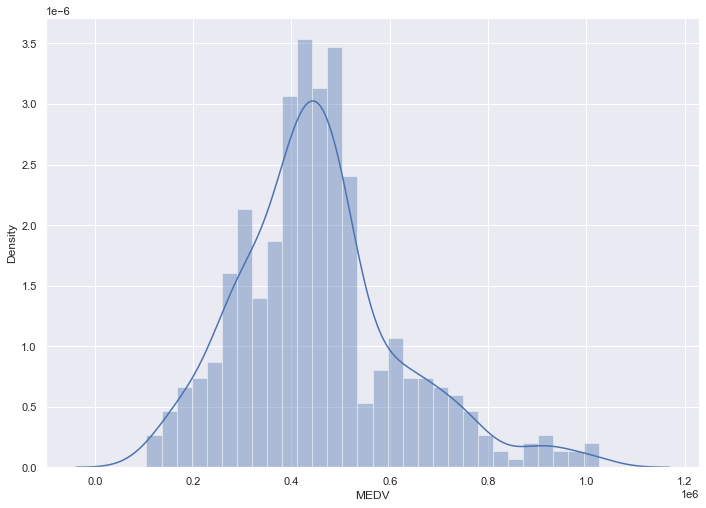

In [11]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(data['MEDV'], bins=30)
plt.show()

In [ ]:
X = data[['RM','LSTAT','PTRATIO']]
y = data['MEDV']
print(X)

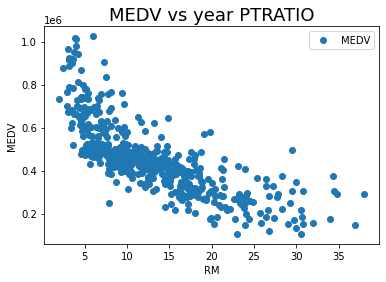

In [6]:
data.plot(x='LSTAT', y='MEDV', style='o')  
plt.title('MEDV vs year PTRATIO', fontsize= 18)      # Plotting the distribution of scores
plt.xlabel('RM',fontsize = 10)  
plt.ylabel('MEDV', fontsize = 10)  
plt.show()

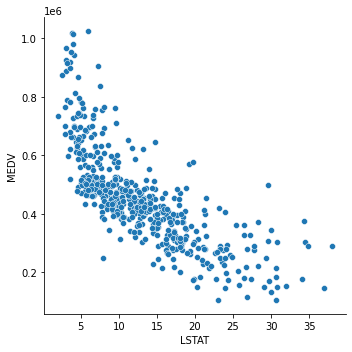

In [22]:
sns.relplot(data=data, x="LSTAT", y="MEDV")                       # used relplot

#### Preparing the data for analysis 

In [32]:
X = data.iloc[:, :-1].values  #selecting column no. of hours of study
y = data.iloc[:, 1].values    #selecting scores column
X

array([[ 6.575,  4.98 , 15.3  ],
       [ 6.421,  9.14 , 17.8  ],
       [ 7.185,  4.03 , 17.8  ],
       ...,
       [ 6.976,  5.64 , 21.   ],
       [ 6.794,  6.48 , 21.   ],
       [ 6.03 ,  7.88 , 21.   ]])

In [33]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y,             #splitting the data into training and testing sets
                            test_size=0.2, random_state=0)            #using scikit-learn's built in function 

#### Training the Algorithm

In [34]:
from sklearn.linear_model import LinearRegression                     #Training the data
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training completed")

Training completed


In [38]:
line = regressor.coef_*X+regressor.intercept_                          # Plotting the regression line
#plt.scatter(X, y)                                                       #training dataset regression line
#plt.plot(X, line, color = "red");
#plt.xlabel("Factors", fontsize = 10)
#plt.ylabel("MEDV", fontsize = 10)
#plt.title("Regression Line - Train set", fontsize = 15,)
#plt.show()

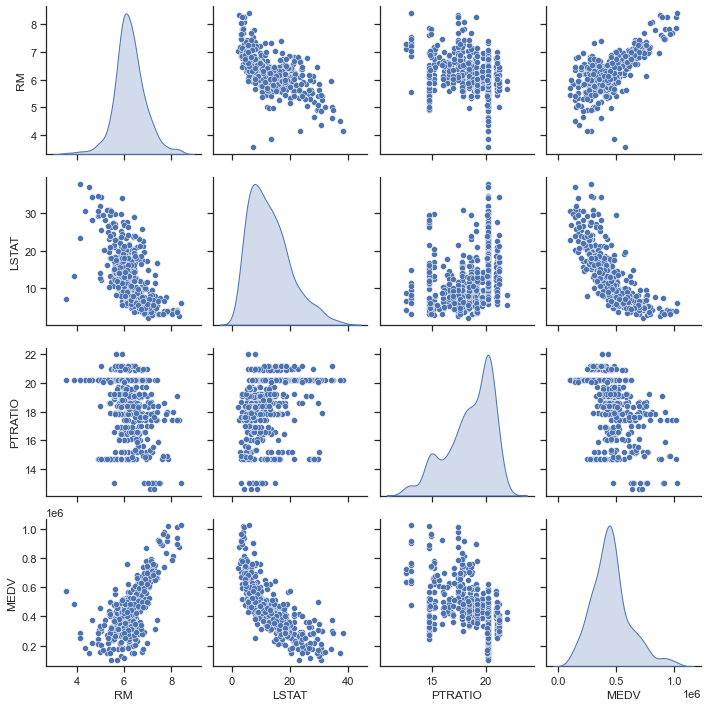

In [13]:
#df = sns.load_dataset('iris')
sns.set_style("ticks")
sns.pairplot(data,diag_kind = "kde",kind = "scatter",palette = "husl")
plt.show()

<AxesSubplot:>

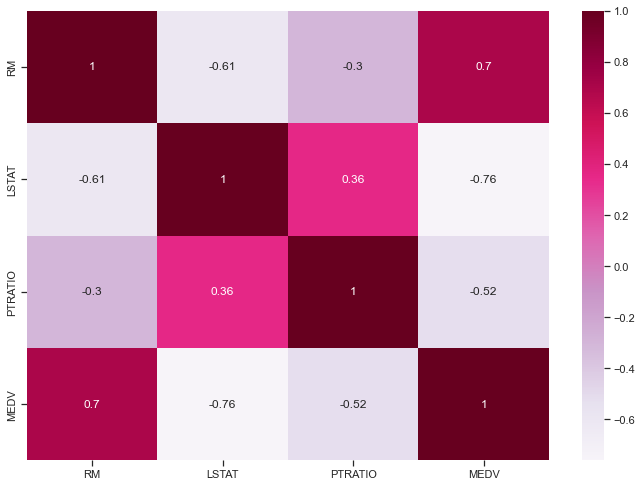

In [15]:
correlation_matrix = data.corr().round(2)                              # annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True,cmap="PuRd")

In [39]:
print(X_test)                                                      # Testing data - In Hours
y_pred = regressor.predict(X_test)                                 # Predicting the scores

[[ 5.834  8.47  21.   ]
 [ 6.842  6.9   13.   ]
 [ 5.403 26.82  14.7  ]
 [ 6.852 19.78  20.2  ]
 [ 6.417  8.81  17.8  ]
 [ 6.406 19.52  20.2  ]
 [ 4.903 29.29  14.7  ]
 [ 6.112 12.67  20.2  ]
 [ 6.163 11.34  18.   ]
 [ 5.965 13.83  21.   ]
 [ 6.223 21.78  20.2  ]
 [ 5.837 15.69  20.2  ]
 [ 6.041  7.7   19.6  ]
 [ 4.628 34.37  20.2  ]
 [ 6.727  9.42  20.9  ]
 [ 5.757 17.31  21.2  ]
 [ 6.279 11.97  18.7  ]
 [ 6.51   7.39  14.7  ]
 [ 5.807 16.03  18.6  ]
 [ 6.739  4.69  15.2  ]
 [ 7.327 11.25  13.   ]
 [ 7.135  4.45  17.   ]
 [ 4.519 36.98  20.2  ]
 [ 5.85   8.77  19.2  ]
 [ 5.569 15.1   19.2  ]
 [ 7.645  3.01  14.9  ]
 [ 7.333  7.79  13.   ]
 [ 7.61   3.11  14.7  ]
 [ 6.395 13.27  20.2  ]
 [ 6.019 12.92  19.2  ]
 [ 6.485 18.85  20.2  ]
 [ 5.889 15.71  15.2  ]
 [ 6.226 10.15  19.1  ]
 [ 6.943  4.59  14.7  ]
 [ 6.232 12.34  18.7  ]
 [ 8.337  2.47  17.4  ]
 [ 6.144  9.09  16.9  ]
 [ 5.627 22.88  20.2  ]
 [ 6.375  9.38  18.6  ]
 [ 6.393  5.19  16.6  ]
 [ 6.193 21.52  20.2  ]
 [ 6.377 20.45  

#### Making the predictions

In [40]:
print(X_test)                                                      # Testing data - with factors
y_pred = regressor.predict(X_test)                                 # Predicting the MEDV

[[ 5.834  8.47  21.   ]
 [ 6.842  6.9   13.   ]
 [ 5.403 26.82  14.7  ]
 [ 6.852 19.78  20.2  ]
 [ 6.417  8.81  17.8  ]
 [ 6.406 19.52  20.2  ]
 [ 4.903 29.29  14.7  ]
 [ 6.112 12.67  20.2  ]
 [ 6.163 11.34  18.   ]
 [ 5.965 13.83  21.   ]
 [ 6.223 21.78  20.2  ]
 [ 5.837 15.69  20.2  ]
 [ 6.041  7.7   19.6  ]
 [ 4.628 34.37  20.2  ]
 [ 6.727  9.42  20.9  ]
 [ 5.757 17.31  21.2  ]
 [ 6.279 11.97  18.7  ]
 [ 6.51   7.39  14.7  ]
 [ 5.807 16.03  18.6  ]
 [ 6.739  4.69  15.2  ]
 [ 7.327 11.25  13.   ]
 [ 7.135  4.45  17.   ]
 [ 4.519 36.98  20.2  ]
 [ 5.85   8.77  19.2  ]
 [ 5.569 15.1   19.2  ]
 [ 7.645  3.01  14.9  ]
 [ 7.333  7.79  13.   ]
 [ 7.61   3.11  14.7  ]
 [ 6.395 13.27  20.2  ]
 [ 6.019 12.92  19.2  ]
 [ 6.485 18.85  20.2  ]
 [ 5.889 15.71  15.2  ]
 [ 6.226 10.15  19.1  ]
 [ 6.943  4.59  14.7  ]
 [ 6.232 12.34  18.7  ]
 [ 8.337  2.47  17.4  ]
 [ 6.144  9.09  16.9  ]
 [ 5.627 22.88  20.2  ]
 [ 6.375  9.38  18.6  ]
 [ 6.393  5.19  16.6  ]
 [ 6.193 21.52  20.2  ]
 [ 6.377 20.45  

In [41]:
y_pred

array([ 8.47,  6.9 , 26.82, 19.78,  8.81, 19.52, 29.29, 12.67, 11.34,
       13.83, 21.78, 15.69,  7.7 , 34.37,  9.42, 17.31, 11.97,  7.39,
       16.03,  4.69, 11.25,  4.45, 36.98,  8.77, 15.1 ,  3.01,  7.79,
        3.11, 13.27, 12.92, 18.85, 15.71, 10.15,  4.59, 12.34,  2.47,
        9.09, 22.88,  9.38,  5.19, 21.52, 20.45, 11.74,  8.94, 21.14,
       14.64,  9.14, 18.03,  3.54, 13.59,  4.59, 10.87,  6.27, 17.64,
        4.73,  7.37, 14.76, 20.62,  9.47,  7.88, 15.79, 21.22, 15.37,
       17.09, 14.09, 18.06, 24.56,  6.56,  8.65, 24.08, 34.41,  7.19,
       14.8 ,  4.7 , 21.24, 11.12, 11.38, 17.21,  5.77, 14.7 , 13.15,
        3.92,  9.88,  9.52, 12.43,  6.07,  6.36,  6.12, 10.63, 19.15,
       12.43, 29.93, 16.94, 16.42,  6.57,  5.98,  9.08,  5.33])

In [42]:
#Parameters used for the model 
regressor.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [43]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})          #Comparison between predicted and test data
df 

,Actual,Predicted
0,8.47,8.47
1,6.90,6.90
2,26.82,26.82
3,19.78,19.78
4,8.81,8.81
...,...,...
93,16.42,16.42
94,6.57,6.57
95,5.98,5.98
96,9.08,9.08


#### Accuracy of the Model 

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(391, 3)
(98, 3)
(391,)
(98,)


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

In [20]:
from sklearn import metrics                              # model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = metrics.r2_score(y_train, y_train_predict)
rmse


87771.10980988554

In [21]:
r2

0.7103793779017609

In [22]:
y_test_predict = lin_model.predict(X_test)                      # model evaluation for testing set
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = metrics.r2_score(y_test, y_test_predict)
rmse

88710.55452921004

In [23]:
r2

0.737609291190839

In [24]:
features=['RM','LSTAT','PTRATIO']

In [25]:
coef2 = pd.Series(lin_model.coef_,features).sort_values()
coef2

PTRATIO   -19813.906548
LSTAT     -11047.720988
RM         77112.412741
dtype: float64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

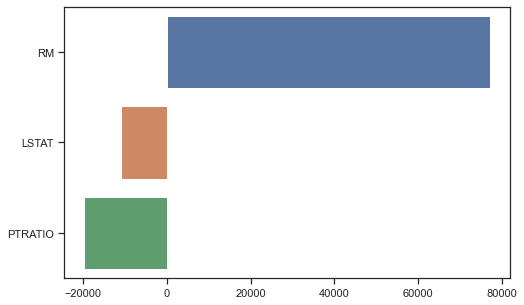

In [26]:
plt.figure(figsize=(8,5))
sns.barplot(lin_model.coef_,features)

#### Prediction of score 

In [27]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test,y_test_predict)
R2

0.737609291190839

Adjusted R Squared

The disadvantage of the R2 score is while adding new features in data the R2 score starts increasing or remains constant but it never decreases because It assumes that while adding more data variance of data increases.

But the problem is when we add an irrelevant feature in the dataset then at that time R2 sometimes starts increasing which is incorrect.

Hence, To control this situation Adjusted R Squared came into existence.

Now as K increases by adding some features so the denominator will decrease, n-1 will remain constant. R2 score will remain constant or will increase slightly so the complete answer will increase and when we subtract this from one then the resultant score will decrease. so this is the case when we add an irrelevant feature in the dataset.

And if we add a relevant feature then the R2 score will increase and 1-R2 will decrease heavily and the denominator will also decrease so the complete term decreases, and on subtracting from one the score increases.

In [28]:
n=489
k=3                                      #k=No. of independent variables
adj_R2_score = 1 - ((1-R2)*(n-1)/(n-k-1))
print(adj_R2_score)

0.7359862558786173


In [29]:
MAE= metrics.mean_absolute_error(y_test,y_test_predict)
MSE= metrics.mean_squared_error(y_test,y_test_predict)
print("mean absolute error:",MAE)
print("mean squared error:",MSE)

mean absolute error: 67079.29625509701
mean squared error: 7869562484.879948


In [30]:
from math import sqrt
rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 88710.55452921004


In [1]:
R2-from sklearn.metrics import r2_score
R2 = r2_score(y_test,y_test_predict)
adjusted R2-n=489
k=3                                      #k=No. of independent variables
adj_R2_score = 1 - ((1-R2)*(n-1)/(n-k-1))
MAE= metrics.mean_absolute_error(y_test,y_test_predict)
MSE= metrics.mean_squared_error(y_test,y_test_predict)
from math import sqrt
rmse = sqrt(MSE)
RMSLE = np.log(np.sqrt(mean_squared_error(y_test,y_test_predict)))

SyntaxError: invalid syntax (<ipython-input-1-fbbbbb4ad951>, line 1)

In [31]:
RMSLE = np.log(np.sqrt(mean_squared_error(y_test,y_test_predict)))
print("RMSLE",np.log(np.sqrt(mean_squared_error(y_test,y_test_predict))))

RMSLE 11.393134152528914


In [32]:
print("R2 value:",R2)
print("Adjusted R2 value:",adj_R2_score)

R2 value: 0.737609291190839
Adjusted R2 value: 0.7359862558786173


In [33]:
print("mean absolute error:",MAE)
print("mean squared error:",MSE)
print("Root Mean Squared Error:",rmse)
print("Root Mean Squared Log Error:", RMSLE)

mean absolute error: 67079.29625509701
mean squared error: 7869562484.879948
Root Mean Squared Error: 88710.55452921004
Root Mean Squared Log Error: 11.393134152528914
